In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import time
#modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('agaricus-lepiota.csv')

In [3]:
df.rename(columns = { 'p': 'poisonous', 'x':'cap_shape', 's': 'cap_surface','n':'cap_color',
                     't': 'bruises', 'p.1': 'odor', 'f': 'gill_attachment',
                     'c': 'gill_spacing', 'n.1': 'gill_size', 'k': 'gill_color',
                     'e': 'stalk_shape', 'e.1': 'stalk_root', 's.1': 'stalk_surface_above_ring',
                     's.2': 'stalk_surface_below_ring', 's.2': 'stalk_surface_below_ring',
                     'w': 'stalk_color_above_ring', 'w.1':'stalk_color_below_ring', 'p.2':'veil_type',
                     'w.2': 'veil_color', 'o': 'ring_number', 'p.3': 'ring_type', 'k.1':'spore_print_color',
                     's.3': 'population', 'u': 'habitat'}, inplace = True)

In [4]:



#features X
df['cap_shape'] = df['cap_shape'].replace(['b','c','x','f'], ['bell','conical', 'convex', 'flat'])
df['cap_surface'] = df['cap_surface'].replace(['f', 'g', 'y', 's'], ['fibrous', 'grooves', 'scaly','smooth'])
df['cap_color'] = df['cap_color'].replace(['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon','gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow'])
df['bruises'] = df['bruises'].replace(['t', 'f'], ['yes', 'no'])
df['odor'] = df['odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy'])
df['gill_attachment'] = df['gill_attachment'].replace(['a', 'd', 'f', 'n'], ['attached', 'descending', 'free', 'notched'])
df['gill_spacing'] = df['gill_spacing'].replace([ 'c', 'w', 'd'], ['close', 'crowded', 'distant'])
df['gill_size'] = df['gill_size'].replace([ 'b', 'n'], ['broad', 'narrow'])
df['gill_color'] = df['gill_color'].replace([ 'k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow'])
df['stalk_shape'] = df['stalk_shape'].replace([ 'e', 't'], ['enlarging', 'tapering'])
df['stalk_root'] = df['stalk_root'].replace(['b', 'c', 'u', 'e', 'z', 'r', '?'], ['bulbous', 'club', 'cup', 'equal', 'rhizomorphs', 'rooted', 'missing'])
df['stalk_surface_above_ring'] = df['stalk_surface_above_ring'].replace([ 'f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'])
df['stalk_surface_below_ring'] = df['stalk_surface_below_ring'].replace([ 'f', 'y', 'k', 's'], ['fibrous', 'scaly', 'silky', 'smooth'])
df['stalk_color_above_ring'] = df['stalk_color_above_ring'].replace([ 'n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'])
df['stalk_color_below_ring'] = df['stalk_color_below_ring'].replace([ 'n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'], ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'])
df['veil_type'] = df['veil_type'].replace([ 'p', 'u'], ['partial', 'universal'])
df['veil_color'] = df['veil_color'].replace([ 'n', 'o', 'w', 'y'], ['brown', 'orange', 'white', 'yellow'])
df['ring_number'] = df['ring_number'].replace([ 'n', 'o', 't'], ['none', 'one', 'two'])
df['ring_type'] = df['ring_type'].replace([ 'c', 'e', 'f', 'l', 'n', 'p', 's', 'z'], ['cobwebby', 'evanescent', 'flaring', 'large', 'none', 'pendant', 'sheathing', 'zone'])
df['spore_print_color'] = df['spore_print_color'].replace([ 'k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'], ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow'])
df['population'] = df['population'].replace(['a', 'c', 'n', 's', 'v', 'y'], ['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary'])
df['habitat'] = df['habitat'].replace(['g', 'l', 'm', 'p', 'u', 'w', 'd'], ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'])


In [5]:
#target y 

#1 is poisonous 0 is edible
df['poisonous'] = df['poisonous'].replace(['e', 'p'], [0 , 1])

In [ ]:
def plotdata(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc = {'figure.figsize': (8, 6)})
        x = sns.countplot(x= data[col], hue = hue, data = data)

# EDA 

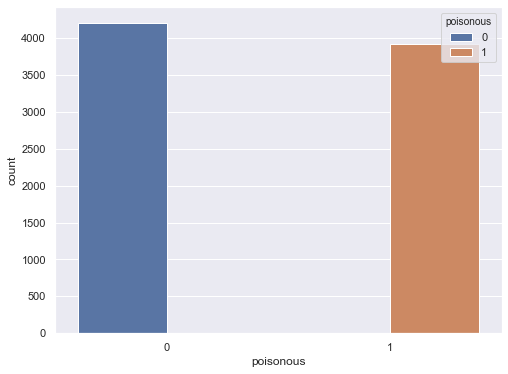

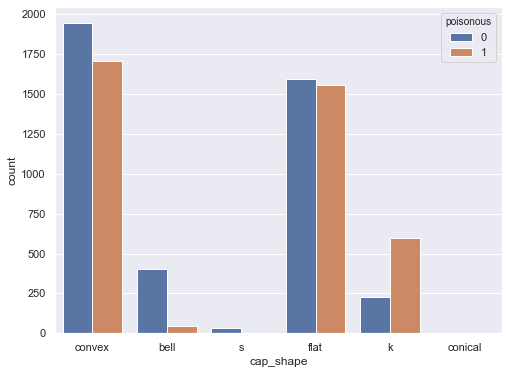

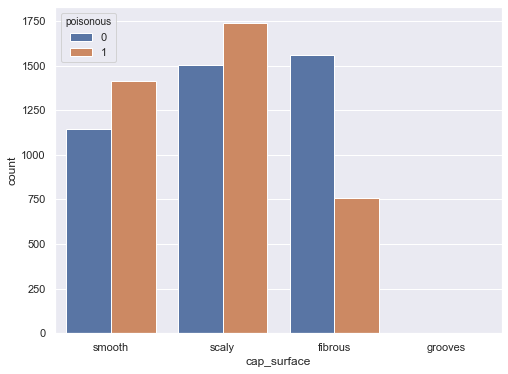

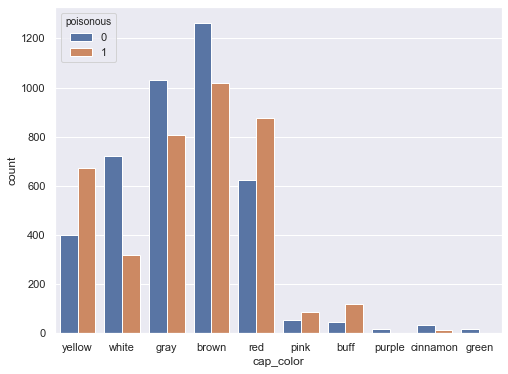

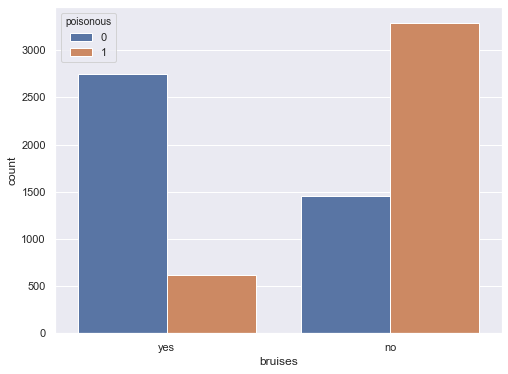

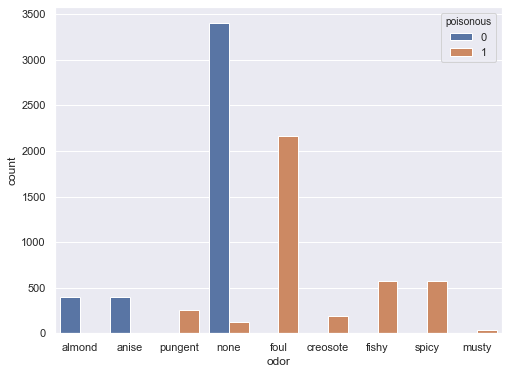

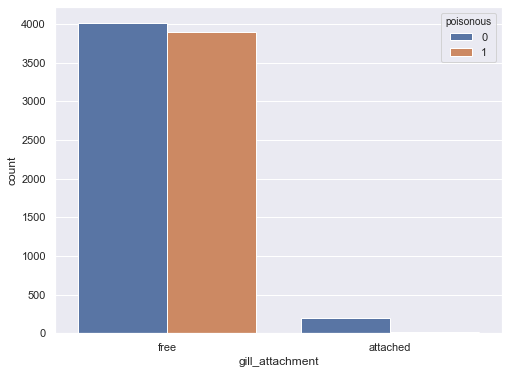

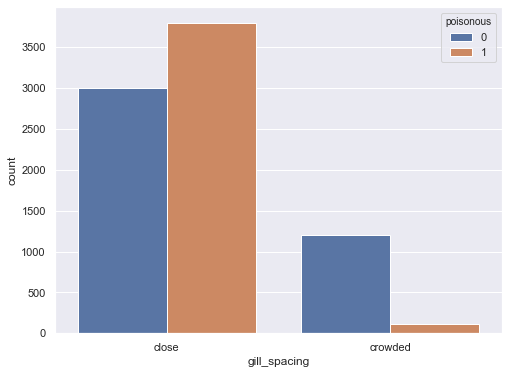

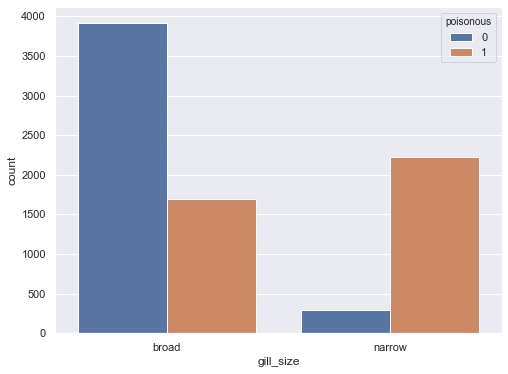

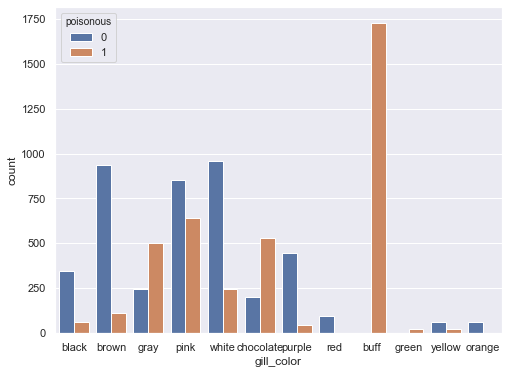

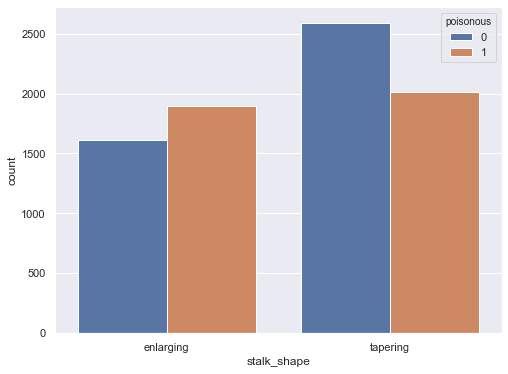

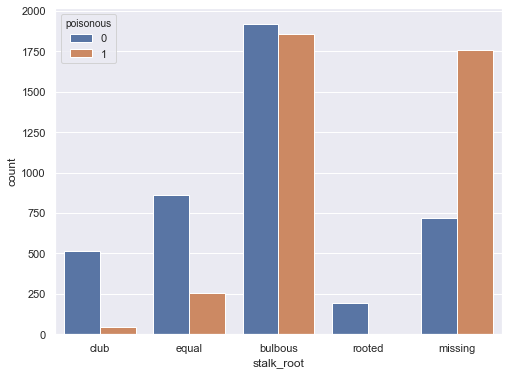

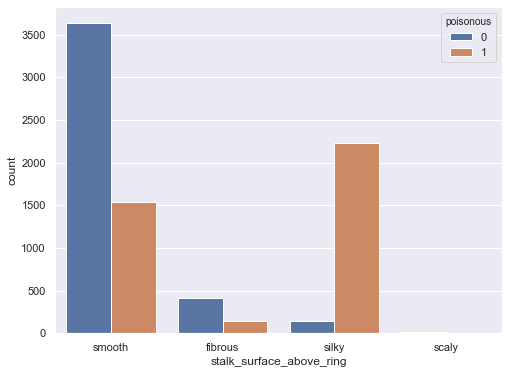

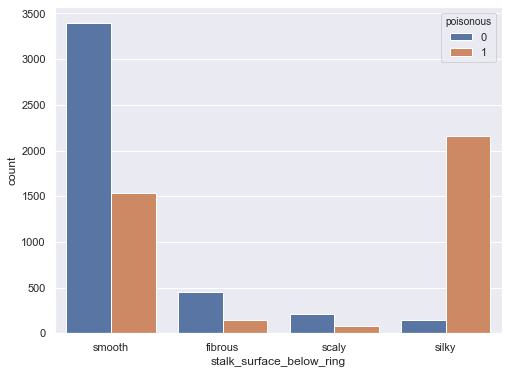

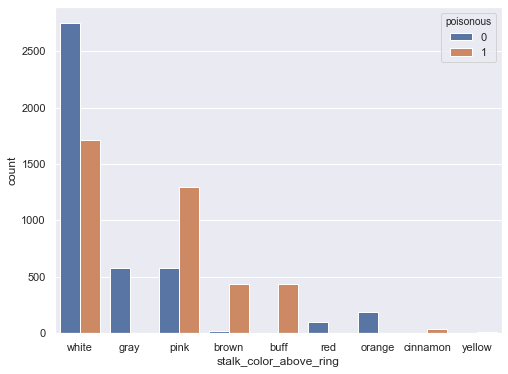

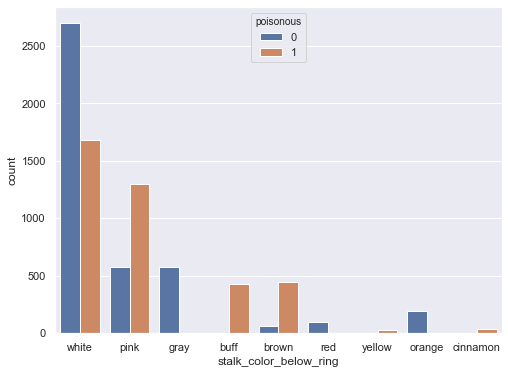

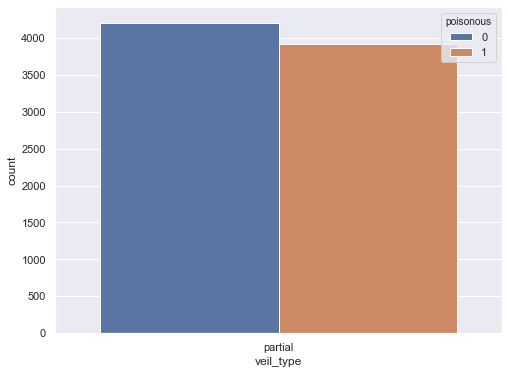

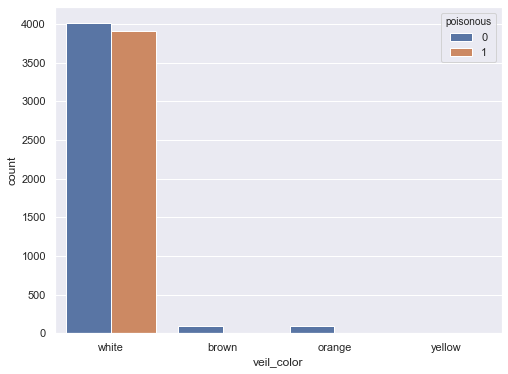

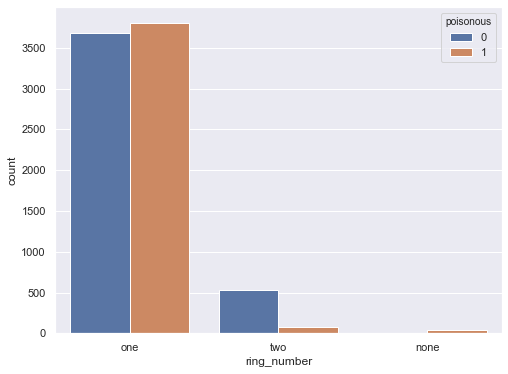

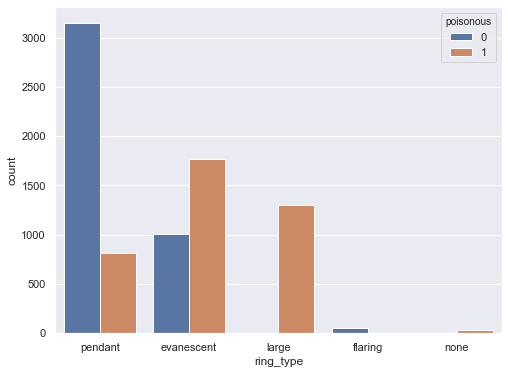

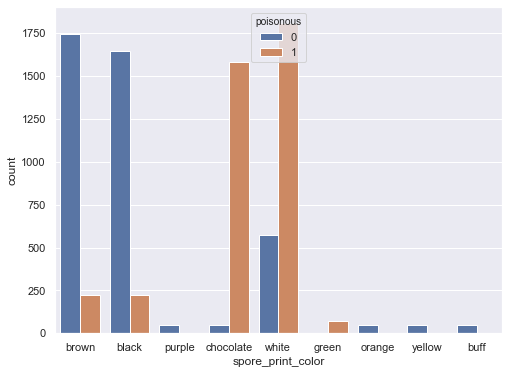

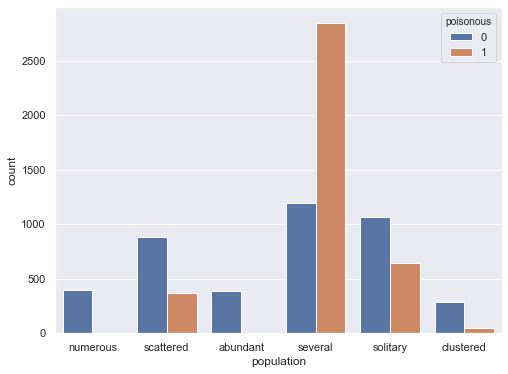

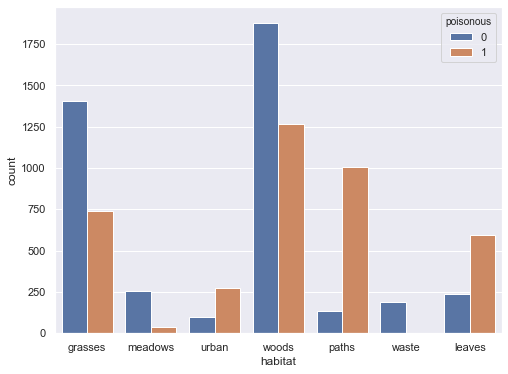

In [9]:
plotdata(df['poisonous'], df)

In [13]:
df['odor'].value_counts

<bound method IndexOpsMixin.value_counts of 0        almond
1         anise
2       pungent
3          none
4        almond
         ...   
8118       none
8119       none
8120       none
8121      fishy
8122       none
Name: odor, Length: 8123, dtype: object>

Observations:


- odor appears to have a clear impact on whether or not a mushroom falls into the category of edible or poisonous.

- gill_color "buff" appears to be an important feature for determining poisonous mushrooms 

- Spore print color "green" does not to appear to have any significance however it is classified as an important feature per initial models. While colors "chocolate" and "white" seem to have more of an effect.

- Stalk surface below ring does not visually appear to have any significant impact, however is classified as an important feature per first decision tree model. 



 - Additional Model Preparation:
 
      - create dummy variables so that all features have individual numeric values (0, 1)
      
      - Columns to drop:

    - veil_type : only contains 1 value, 'partial'
    - stalk_root: contains 2480 missing values
    - poisonous (target)

In [15]:
df_dropped = df.drop(columns = ['veil_type', 'stalk_root', 'poisonous'])

In [16]:
X = pd.get_dummies(df_dropped)

In [17]:
y = df['poisonous']

# Initial Decision Tree

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [19]:
# Instantiate and fit initial DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

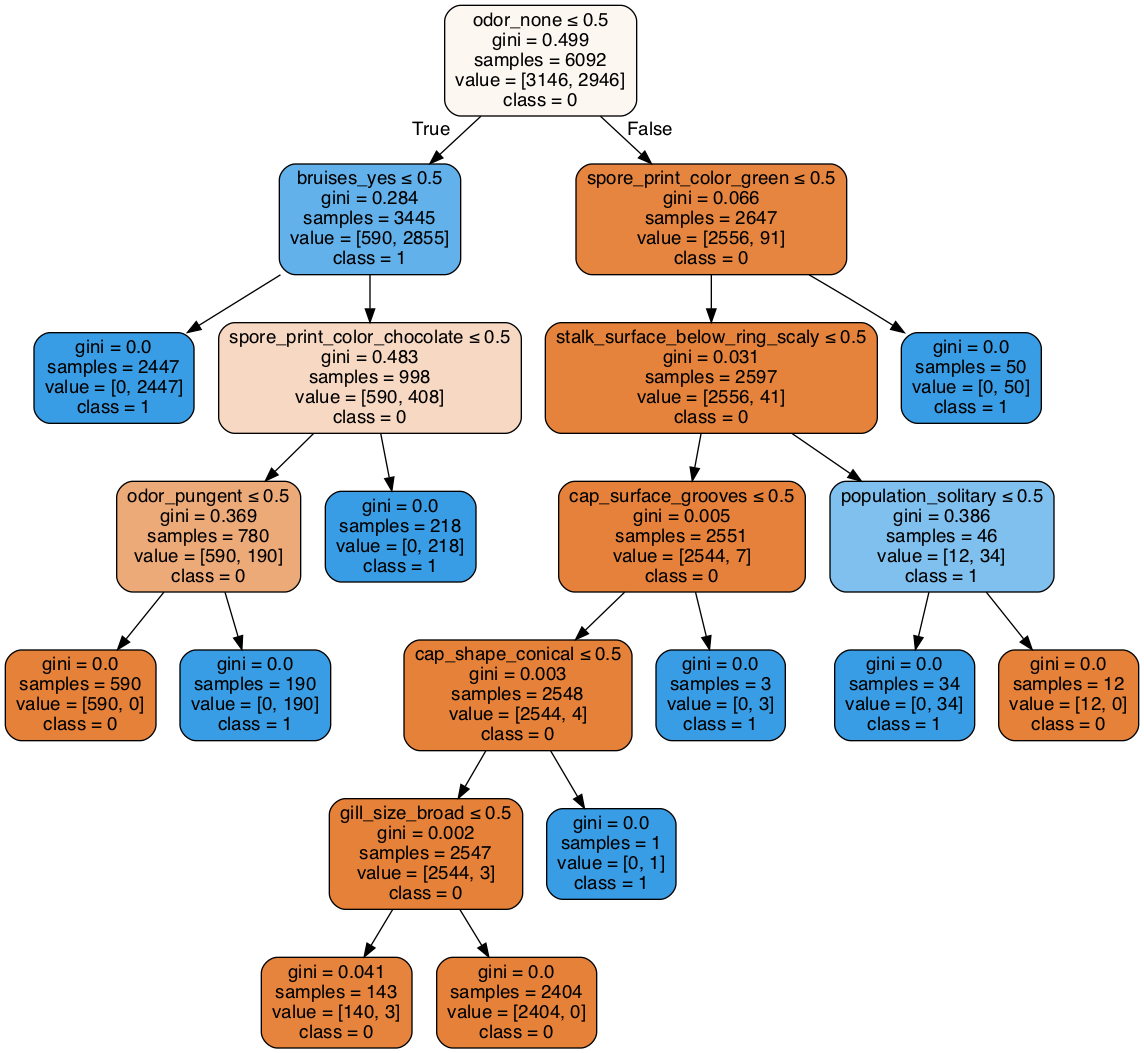

In [20]:
#Create DOT data
dot_data = export_graphviz(tree_clf, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# # Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [21]:
pred = tree_clf.predict(X_test)

In [22]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


AUC is :1.0

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,1062,0,1062
1,0,969,969
All,1062,969,2031


In [23]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

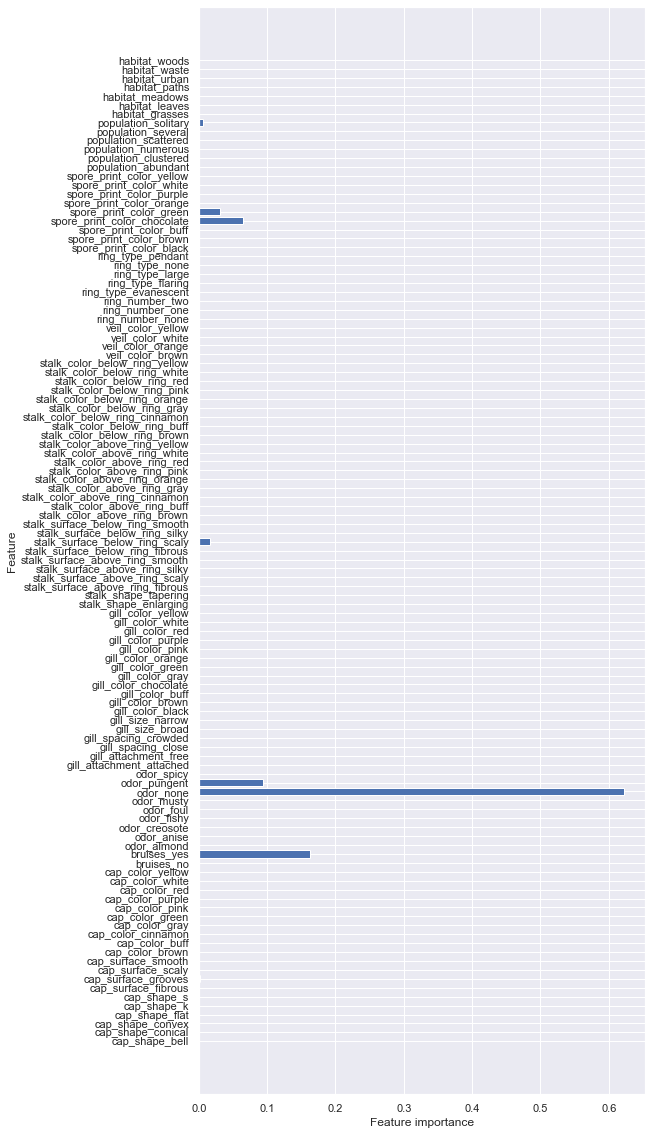

In [24]:
plot_feature_importances(tree_clf)

- Odor having the greatest feature importance is no surprise. 

- Spore print color "green" does not to appear to have any significance however it is included. While colors "chocolate" and "white" had visually appeared to have more of an effect during EDA.

- Stalk surface below ring does not visually appear to have any significant impact, however is classified as an important feature per this model.